# Practical No 7: Implement the linear threshold and independent cascade model for influence analysis.

The Linear Threshold (LT) and Independent Cascade (IC) models are used for influence propagation analysis in networks, particularly in the context of social networks, marketing strategies, information diffusion, and viral spread.

# Linear Threshold (LT) Model
In this model:

1. Each node has a threshold value (e.g., randomly assigned between 0 and 1).
2. Each edge has an influence weight.
3. A node is activated if the sum of weights from its active neighbors exceeds its threshold.

# Independent Cascade (IC) Model
In this model:

1. When a node is activated, it has a single chance to activate its neighbors with a certain probability.
2. This process continues in discrete steps until no further activations occur.

In [ ]:
import networkx as nx
import random

In [ ]:
def linear_threshold_model(graph, seeds, max_steps=10):
    thresholds = {node: random.uniform(0, 1) for node in graph.nodes}
    active = set(seeds)
    new_active = set(seeds)

    for _ in range(max_steps):
        current_active = set()
        for node in graph.nodes:
            if node not in active:
                influence = sum(graph[u][node]['weight'] for u in graph.predecessors(node) if u in active)
                if influence >= thresholds[node]:
                    current_active.add(node)
        if not current_active:
            break
        active.update(current_active)
        new_active = current_active

    return active

In [ ]:
G = nx.DiGraph()
edges = [(1, 2, 0.2), (1, 3, 0.1), (2, 3, 0.5), (2, 4, 0.4), (3, 4, 0.3)]
G.add_weighted_edges_from(edges)

In [ ]:
import matplotlib.pyplot as plt

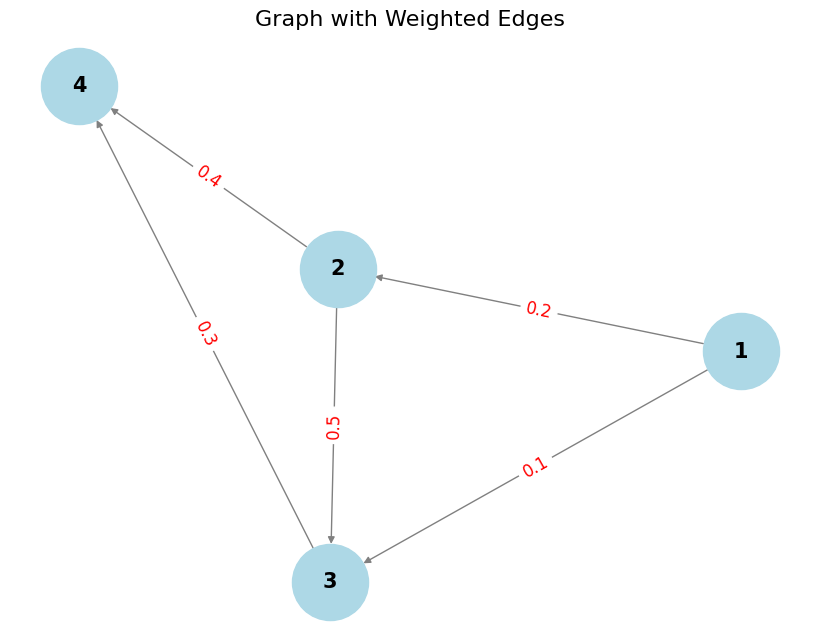

In [ ]:
pos = nx.spring_layout(G)

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=15, font_weight='bold')

edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.title("Graph with Weighted Edges", fontsize=16)
plt.show()

In [ ]:
seeds = [1]

In [ ]:
lt_result = linear_threshold_model(G, seeds)
print("Activated nodes (LT Model):", lt_result)

Activated nodes (LT Model): {1}


In [ ]:
def independent_cascade_model(graph, seeds, propagation_prob=0.01, max_steps=10):
    active = set(seeds)
    new_active = set(seeds)

    for _ in range(max_steps):
        current_active = set()
        for node in new_active:
            for neighbor in graph.successors(node):
                if neighbor not in active:
                    if random.random() <= propagation_prob:
                        current_active.add(neighbor)
        if not current_active:
            break
        active.update(current_active)
        new_active = current_active

    return active

In [ ]:
ic_result = independent_cascade_model(G, seeds)
print("Activated nodes (IC Model):", ic_result)

Activated nodes (IC Model): {1, 2}


# Analysis

In the **LT model**, a node becomes activated only when the sum of the influence weights from its active neighbors exceeds its threshold.

Here, only the seed node (1) is activated because:

* Nodes 2 and 3 receive influence from node 1 (weights: 0.2 and 0.1 respectively), but the total influence does not exceed their thresholds (randomly set values between 0 and 1).
* As a result, no further activations occur, leaving only the seed node active.

In the **IC model**, when a node is activated, it tries to activate its neighbors with a probability of activation (propagation_prob, default 0.01 in the example).

Here:
* Node 1 successfully activated node 2 with the propagation probability.
* Node 2 attempted to activate its neighbors (3 and 4), but the activation did not succeed (likely due to the low propagation probability).

Thus, the set of activated nodes includes the seed (1) and node 2.

# Conclusion

In this practical, we explored the Linear Threshold and Independent Cascade models for influence propagation in networks. These models provide valuable insights into how information, behaviors, or trends can spread across nodes, making them useful tools for applications in marketing, social network analysis, and epidemic modeling.